<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/eii_u3_01_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE a

1. Seleccionar una marca y obtener los datos:

Puedes utilizar una fuente como Yahoo Finance o una API como Alpha Vantage para obtener los precios de cierre diarios de las acciones durante el último año.

2. Graficar la serie de tiempo:

Una vez que tengas los datos, utiliza una biblioteca como matplotlib en Python para graficarlos.
Asegúrate de etiquetar el eje x como "Fecha" y el eje y como "Precio de cierre". Si es necesario, incluye una leyenda con el nombre de la marca.

In [2]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='TSLA',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
Date,,,,,,


# Importar dataframe si YF da error

In [3]:
pip install alpha_vantage

In [4]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'INCNW6J52SIRK9LG'   # esta es mía, no la uses o habrá problemas
#Clave PAULINA
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de TSLA
ticker = 'TSLA'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Volume
date,,,,,
2025-04-01,263.800,277.4500,259.2500,268.46,146486911.0
2025-03-31,249.310,260.5600,243.3601,259.16,134008936.0
2025-03-28,275.575,276.1000,260.5700,263.55,123809389.0
2025-03-27,272.480,291.8500,271.8216,273.13,162572146.0
2025-03-26,282.660,284.9000,266.5100,272.06,156254441.0
...,...,...,...,...,...
2024-01-08,236.140,241.2500,235.3000,240.45,85166580.0
2024-01-05,236.860,240.1196,234.9001,237.49,92240035.0
2024-01-04,239.250,242.7000,237.7300,237.93,102629283.0


# Medias móviles

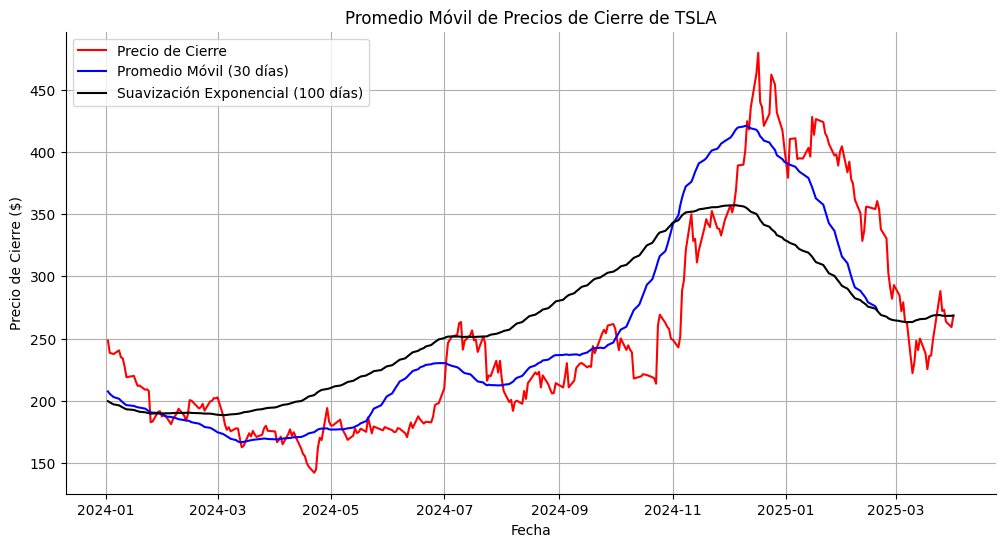

In [5]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['TSLA_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['TSLA_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TSLA_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de TSLA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Este gráfico ayuda a:

Visualizar la tendencia general de los precios de Tesla.

Comparar dos métodos de suavización:

SMA: muestra una tendencia estable pero responde lentamente a los cambios.

SES: reacciona más rápido ante nuevas variaciones.

# PARTE b

Prueba de estacionariedad:

Utiliza una prueba como la prueba de raíz unitaria de Dickey-Fuller aumentada (ADF) o KPSS para determinar si la serie es estacionaria.
Los resultados de la prueba te indicarán si rechazas o no la hipótesis nula de no estacionariedad, lo cual puedes interpretar para concluir si la serie es estacionaria.

# Prueba Dickey-Fuller Aumentada

In [6]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['TSLA_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -1.1966788697842232
p-value: 0.6750227440597075
La tendencia no es estacionaria (aceptamos la hipótesis nula).


no es estacionaria, ya que:

Estadístico ADF = -1.19 (muy cercano a 0).

p-value = 0.675 > 0.05 → no se puede rechazar la hipótesis nula.

# PARTE c

1. Regresión polinomial:

Realiza una regresión polinomial de diferentes grados sobre los datos para identificar el grado mínimo necesario que logre que los residuales sean estacionarios.
Puedes usar numpy o sklearn para la regresión polinomial y luego obtener los residuales.

2. Prueba de estacionariedad en los residuales:

Aplica una prueba de estacionariedad (como ADF) en los residuales para verificar si se ha logrado la estacionariedad.

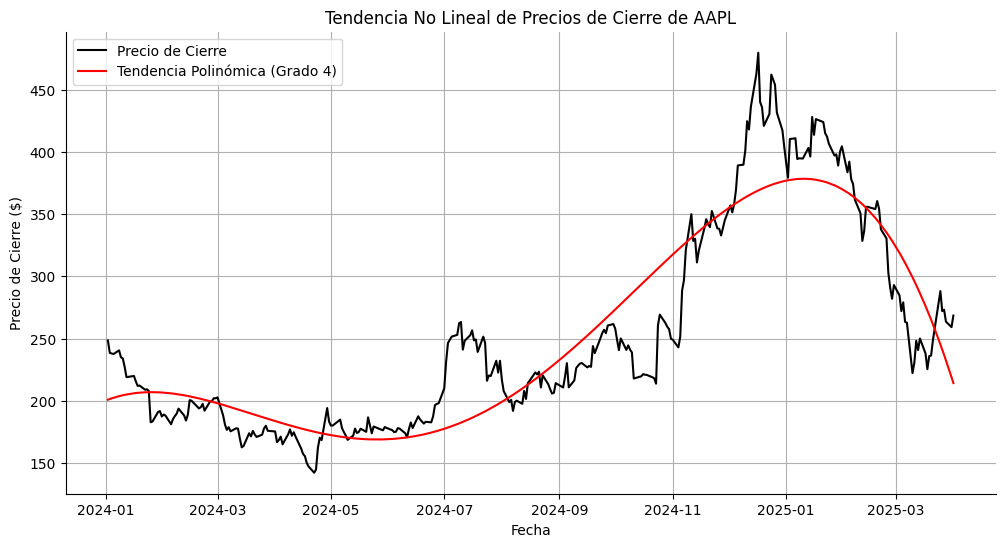

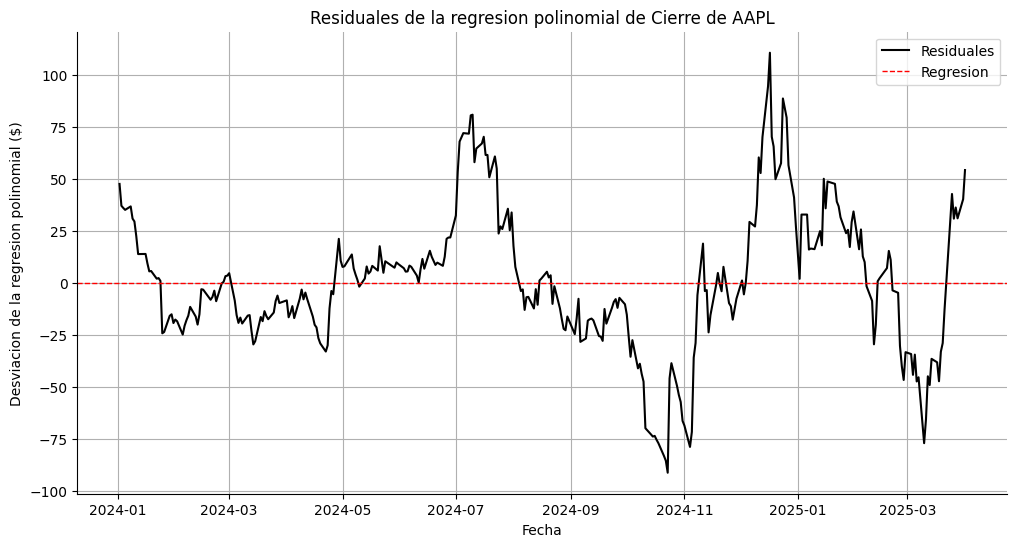

In [7]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TSLA_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Gráfico 1:** Precio de cierre y tendencia polinómica (grado 4)
Este gráfico muestra el comportamiento del precio de cierre de la acción de TSLA desde enero de 2024 hasta marzo de 2025, junto con una curva de tendencia polinómica ajustada de grado 4.

Observaciones:

El precio tiene una forma no lineal clara, con una gran subida a finales de 2024 y una caída significativa después.

La tendencia polinómica logra capturar bastante bien ese patrón general: crecimiento y luego declive.

El modelo polinómico ayuda a visualizar la dirección general de los precios sin seguir todos los movimientos bruscos del mercado.

**Gráfico 2:** Residuales de la regresión polinómica
Este gráfico representa las diferencias entre el precio real y la tendencia polinómica. Idealmente, si la tendencia se ajustó correctamente, estos residuales deben parecer ruido aleatorio alrededor de cero (sin patrón visible).

Observaciones:

Aunque los residuales oscilan alrededor de cero, no parecen completamente aleatorios; hay períodos donde muestran patrones o agrupaciones (especialmente en la subida de finales de 2024).

Esto sugiere que aún puede haber alguna estructura no capturada por la tendencia polinómica (quizá estacionalidad o autocorrelación).

In [10]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -2.9195200699073873
p-value (residuales): 0.04312471178155441
La tendencia es estacionaria (rechazamos la hipótesis nula).


# CONCLUSIONES GENERALES:

En este análisis se trabajó con los precios de cierre diarios de la acción de Tesla, Inc. (TSLA), abarcando el periodo del 1 de enero de 2024 al 1 de abril de 2025.

Primero, se graficó la serie de tiempo incluyendo el precio de cierre, un promedio móvil simple (SMA) y una suavización exponencial (SES), lo cual permitió visualizar la tendencia y fluctuaciones del precio a lo largo del tiempo.

Luego, se aplicó la prueba de Dickey-Fuller aumentada (ADF) para evaluar la estacionariedad de la serie. El resultado mostró un p-value de 0.675, lo cual nos llevó a no rechazar la hipótesis nula, concluyendo que la serie original no es estacionaria.

Para eliminar la tendencia no estacionaria, se ajustó una regresión polinomial de grado 4, modelando adecuadamente la forma curvada de la serie. Se calcularon y graficaron los residuales de este modelo, los cuales representan las variaciones no explicadas por la tendencia.

Finalmente, se volvió a aplicar la prueba ADF a los residuales, obteniendo un estadístico ADF de -2.91 y un p-value de 0.043, lo que permitió rechazar la hipótesis nula y concluir que los residuales sí son estacionarios.

Esto indica que la regresión polinomial de grado 4 fue suficiente para capturar la tendencia de la serie, y que el componente restante (los residuales) puede ser modelado como un proceso estacionario.